# Part 1- Data Preprocessing

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:,3:13]
y = dataset.iloc[:, 13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [29]:
dataset["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [30]:
dataset["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
# Geography and Gender are Categorical Variables
# Creating dummy variables
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X["Gender"],drop_first=True)

In [10]:
# Concating the dataframes
X = pd.concat([X,geography,gender], axis=1)

In [11]:
# Dropping Unnecessary columns that have already been dummied
X = X.drop(["Geography","Gender"],axis=1)

In [12]:
# Splitting the dataset into Training and Testing Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2, random_state =0)


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2- Making the ANN

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [15]:
# Initialize the ANN
classifier = Sequential()

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
# Adding a Dropout Layer
classifier.add(Dropout(0.4))

In [17]:
# Adding the second input layer
classifier.add(Dense(units =6, kernel_initializer = 'he_uniform', activation = 'relu'))
# Adding a Dropout Layer
classifier.add(Dropout(0.2))

In [18]:
# Adding the Output Layer
classifier.add(Dense(units =1, kernel_initializer='glorot_uniform', activation ='sigmoid'))

In [19]:
# Summary of the Classifier
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compiling the ANN Model
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [21]:
# Fitting the ANN to the training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 7s 8ms/step - loss: 0.7617 - accuracy: 0.6533 - val_loss: 0.6106 - val_accuracy: 0.7073
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.6495 - accuracy: 0.7171 - val_loss: 0.5585 - val_accuracy: 0.7649
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5827 - accuracy: 0.7503 - val_loss: 0.5338 - val_accuracy: 0.7891
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5523 - accuracy: 0.7768 - val_loss: 0.5196 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5339 - accuracy: 0.7850 - val_loss: 0.5106 - val_accuracy: 0.7952
Epoch 6/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5237 - accuracy: 0.7899 - val_loss: 0.5045 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5108 - accuracy: 0.7929 - val_loss: 0.5004 - val_accuracy: 0.7955

Epoch 58/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4382 - accuracy: 0.8164 - val_loss: 0.4308 - val_accuracy: 0.8152
Epoch 59/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4382 - accuracy: 0.8164 - val_loss: 0.4297 - val_accuracy: 0.8179
Epoch 60/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4334 - accuracy: 0.8192 - val_loss: 0.4291 - val_accuracy: 0.8183
Epoch 61/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4354 - accuracy: 0.8162 - val_loss: 0.4294 - val_accuracy: 0.8164
Epoch 62/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4331 - accuracy: 0.8188 - val_loss: 0.4288 - val_accuracy: 0.8171
Epoch 63/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4361 - accuracy: 0.8173 - val_loss: 0.4289 - val_accuracy: 0.8152
Epoch 64/100
536/536 [==============================] - 3s 6ms/step - loss: 0.4351 - accuracy: 0.8181 - val_loss: 0.4287 - val_accuracy:

In [22]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.5)

63/63 [==============================] - 1s 3ms/step


In [23]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1583,   12],
       [ 320,   85]], dtype=int64)

In [24]:
# Calculating the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.834

In [25]:
# List all Data in the history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


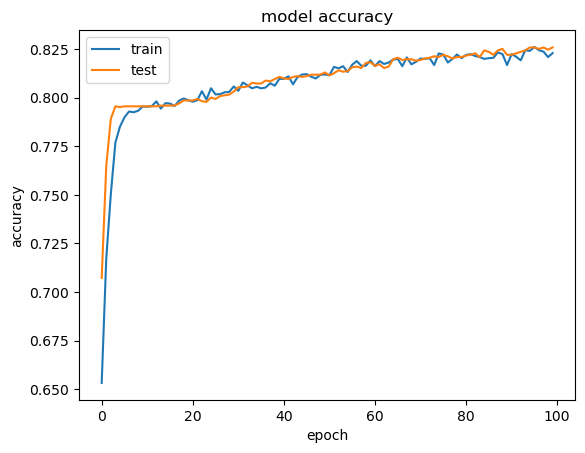

In [26]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()